# Initializing an InfluxDB Client

Setting up basic parameter for influxDB client. 

In [1]:
from influxdb_client import InfluxDBClient
import warnings

# Initialize the InfluxDB client
token = "fP-GBq8Z1wZE7iW8qFBuxVy-ArVP9TqVec0naJ77XLECiwSr82aRXqvo3ylXZqU_2ad2vxWGcMoMbl3PXqAZ7A=="
server_url = "http://140.112.12.62:8086"
client = InfluxDBClient(url=server_url, token=token)
org = "NTUCE"
query_api = client.query_api()

# Disable influxdb pivot warning
import warnings
from influxdb_client.client.warnings import MissingPivotFunction
warnings.simplefilter("ignore", MissingPivotFunction)

## Query data from Pluvio2
Pluvio2 gets new data every **1** min.  
Data could be large when you query it over a long period of time.  
  
You can choose either way listed below to save time:
* Preprocess data on server using flux.
* Query raw bytes data rather turning them into FluxTable.  
* Using asynchronous Influxdb API.
* Turning raw data into csv or pandas tables rather than FluxTable.

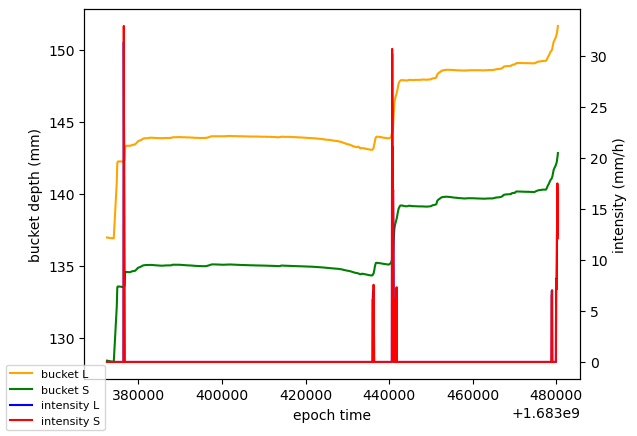

In [23]:
import matplotlib.pyplot as plt


with open("flux/pluvio_bucket.flux", "r") as fluxfile:
    query_str = fluxfile.read()
    bucket = query_api.query_data_frame(org="NTUCE", query = query_str)
    # Drop useless columns
    bucket.drop(columns=["result", "table"], inplace=True)
    # Reindex the dataframe with time column
    bucket.set_index("_time", inplace=True)

with open("flux/pluvio_intensity.flux", "r") as fluxfile:
    query_str = fluxfile.read()
    intensity = query_api.query_data_frame(org="NTUCE", query = query_str)
    # Drop useless columns
    intensity.drop(columns=["result", "table"], inplace=True)
    # Reindex the dataframe with time column
    intensity.set_index("_time", inplace=True)

fig, ax1 = plt.subplots()
plt.rcParams['legend.fontsize'] = 8

# Plot bucket depth
ax1.plot(bucket.index, bucket["_value_pluvioL"], color="orange", label="bucket L")
ax1.plot(bucket.index, bucket["_value_pluvioS"], color="green", label="bucket S")
ax1.set_xlabel("epoch time")
ax1.set_ylabel("bucket depth (mm)")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot intensity
ax2.plot(intensity.index, intensity["_value_pluvioL"], color="blue", label="intensity L")
ax2.plot(intensity.index, intensity["_value_pluvioS"], color="red", label="intensity S")
ax2.set_ylabel("intensity (mm/h)")

fig.legend(loc="lower left")
plt.show()

### Query machine status data from Pluvio.
There isn't a lot machine information from Pluvio.  
Here we query temperature.  

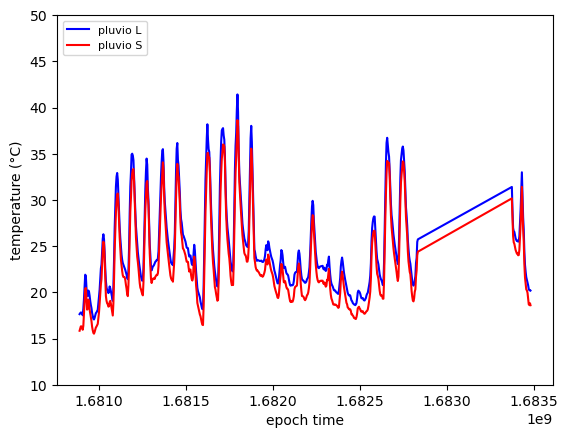

In [28]:
with open("flux/pluvio_temp.flux", "r") as fluxfile:
    query_str = fluxfile.read()
    temp = query_api.query_data_frame(org="NTUCE", query = query_str)
    # Drop useless columns
    temp.drop(columns=["result", "table"], inplace=True)
    # Reindex the dataframe with time column
    temp.set_index("_time", inplace=True)

fig, ax1 = plt.subplots()

# Plot visibility
ax1.plot(temp.index, temp["_value_pluvioL"], color="blue", label="pluvio L")
ax1.plot(temp.index, temp["_value_pluvioS"], color="red", label="pluvio S")
ax1.set_ylim(10, 50)
ax1.set_xlabel("epoch time")
ax1.set_ylabel("temperature (°C)")
ax1.legend(loc="upper left")
